## 1. Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

## 2. Reading the data

In [2]:
df=pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [5]:
df.shape

(569, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

As there is no null value in the data, there is no need to data cleaning

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 3. EDA and Visualization

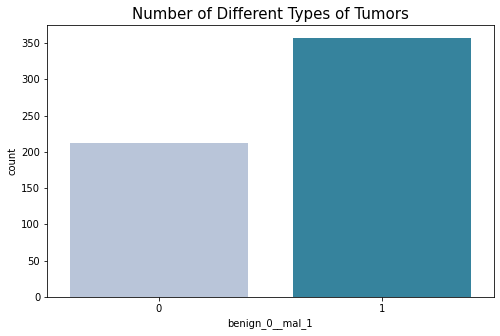

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='benign_0__mal_1',data=df, palette='PuBuGn')
plt.title('Number of Different Types of Tumors', fontsize=15)
plt.show()

We can see that benign tumor cases are more than malignent tumor cases in this dataset.

C:\Users\Soha\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


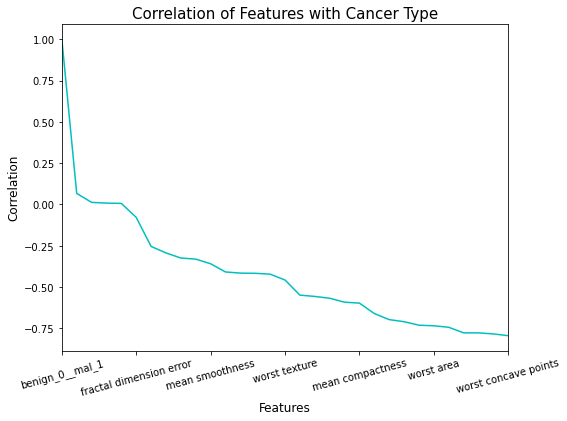

In [9]:
plt.figure(figsize=(8,6))
df.corr()['benign_0__mal_1'].sort_values(ascending=False).plot(kind='line', color='c')
plt.xticks(rotation=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Cancer Type', fontsize=15)
plt.show()

We will drop the label which is perfectly correlated at 1 in a barplot.

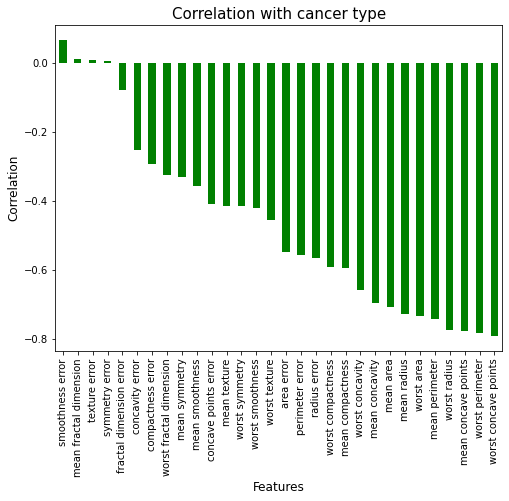

In [10]:
plt.figure(figsize=(8,6))
df.corr()['benign_0__mal_1'].sort_values(ascending=False).drop('benign_0__mal_1').plot(kind='bar', color='g')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=90)
plt.title('Correlation with cancer type', fontsize=15)
plt.show()

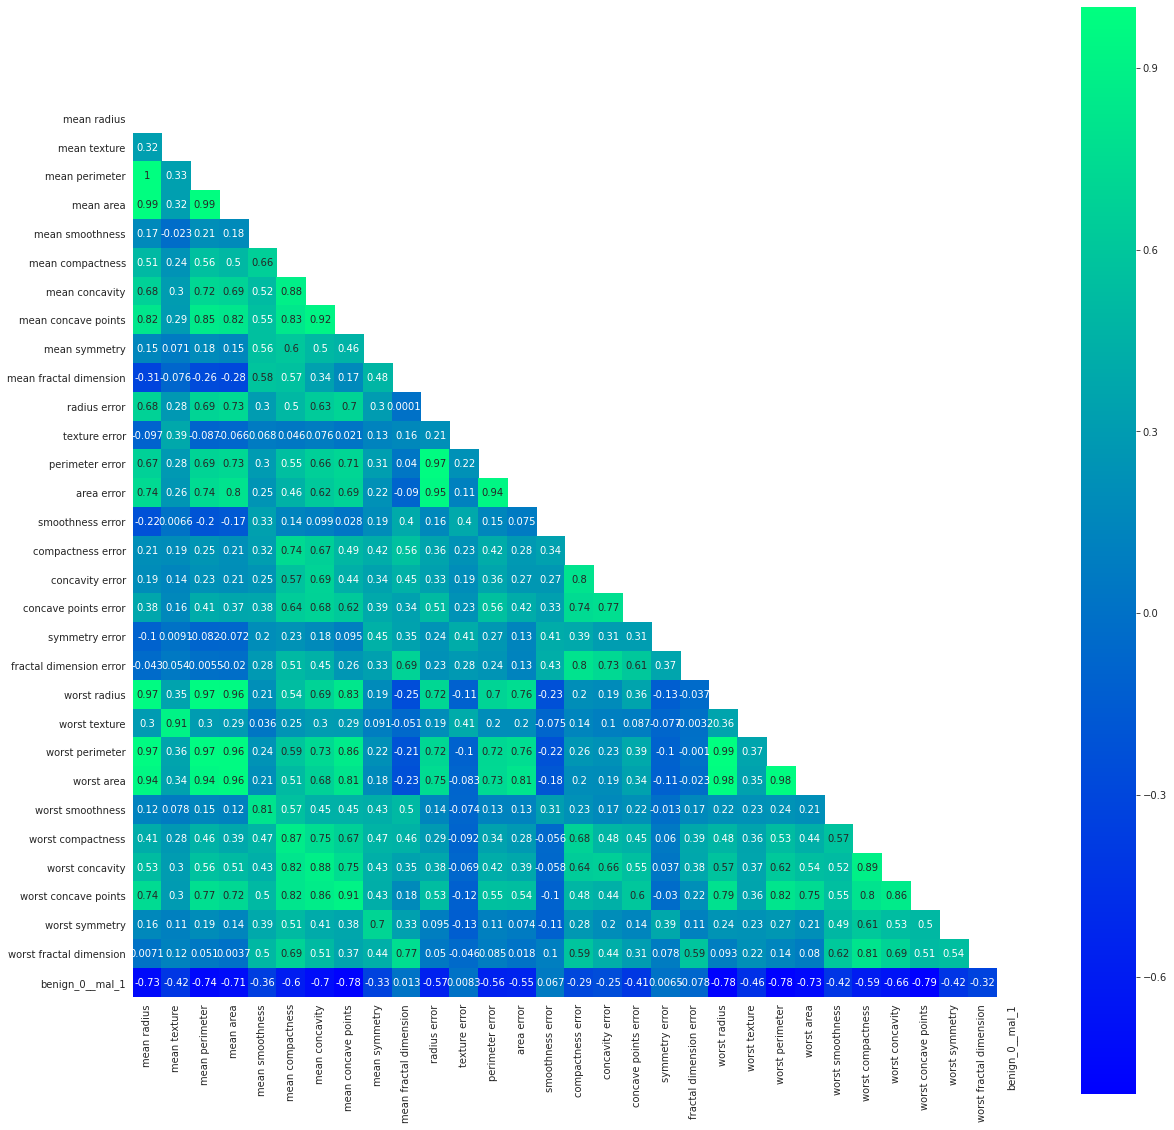

In [11]:
plt.figure(figsize=(20,20))
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True, annot=True, cmap='winter')

## 4. Predicting the Cancer Types 

### 4.1. Splitting the Data

In [107]:
X=df.drop(['benign_0__mal_1'], axis=1).values
y=df['benign_0__mal_1'].values

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.2. Scaling

In [109]:
mms=MinMaxScaler()

In [110]:
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [111]:
X_train=mms.transform(X_train)

In [112]:
X_test=mms.transform(X_test)

### 4.3. Model with No Early Stopping and No Droupout Layer

In the next step, we choose too many epochs and we use try and error to avoid overfitting and determine the optimal model for prediction, in three trials.

#### 4.3.1. Creating the Model

In [113]:
model= Sequential()

model.add(Dense(30,activation='relu'))
          
model.add(Dense(30,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

#### 4.3.2. Training the model

In [114]:
model.fit(X_train,y_train,epochs=600, validation_data=(X_test,y_test),batch_size=128)

Epoch 1/600
4/4 [==============================] - 0s 25ms/step - loss: 0.6950 - val_loss: 0.6833
Epoch 2/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6789 - val_loss: 0.6686
Epoch 3/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6642 - val_loss: 0.6559
Epoch 4/600
4/4 [==============================] - 0s 5ms/step - loss: 0.6511 - val_loss: 0.6444
Epoch 5/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6390 - val_loss: 0.6318
Epoch 6/600
4/4 [==============================] - 0s 5ms/step - loss: 0.6250 - val_loss: 0.6180
Epoch 7/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6098 - val_loss: 0.6026
Epoch 8/600
4/4 [==============================] - 0s 6ms/step - loss: 0.5932 - val_loss: 0.5868
Epoch 9/600
4/4 [==============================] - 0s 6ms/step - loss: 0.5760 - val_loss: 0.5698
Epoch 10/600
4/4 [==============================] - 0s 6ms/step - loss: 0.5577 - val_loss: 0.5508
Epoch 11/600
4/4 [==========

4/4 [==============================] - 0s 5ms/step - loss: 0.0636 - val_loss: 0.1033
Epoch 168/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0563 - val_loss: 0.1025
Epoch 169/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0561 - val_loss: 0.1086
Epoch 170/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0595 - val_loss: 0.1057
Epoch 171/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0563 - val_loss: 0.1022
Epoch 172/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0543 - val_loss: 0.1011
Epoch 173/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0536 - val_loss: 0.1011
Epoch 174/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0535 - val_loss: 0.1017
Epoch 175/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0548 - val_loss: 0.1049
Epoch 176/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0552 - val_loss: 0.1024
Epoch 177/600
4/4 [=====

Epoch 250/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0461 - val_loss: 0.1166
Epoch 251/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0425 - val_loss: 0.1176
Epoch 252/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0454 - val_loss: 0.1177
Epoch 253/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0452 - val_loss: 0.1168
Epoch 254/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0440 - val_loss: 0.1164
Epoch 255/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0422 - val_loss: 0.1190
Epoch 256/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0437 - val_loss: 0.1187
Epoch 257/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0432 - val_loss: 0.1182
Epoch 258/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0425 - val_loss: 0.1192
Epoch 259/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0425 - val_loss: 0.1185
Epoch 260/

Epoch 415/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0315 - val_loss: 0.1676
Epoch 416/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0318 - val_loss: 0.1680
Epoch 417/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0310 - val_loss: 0.1676
Epoch 418/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.1688
Epoch 419/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0319 - val_loss: 0.1689
Epoch 420/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0314 - val_loss: 0.1686
Epoch 421/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0310 - val_loss: 0.1689
Epoch 422/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 0.1691
Epoch 423/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0322 - val_loss: 0.1706
Epoch 424/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0312 - val_loss: 0.1708
Epoch 425/

Epoch 580/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0240 - val_loss: 0.2009
Epoch 581/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0259 - val_loss: 0.1995
Epoch 582/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0252 - val_loss: 0.1976
Epoch 583/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0242 - val_loss: 0.1990
Epoch 584/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0284 - val_loss: 0.2011
Epoch 585/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.1972
Epoch 586/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0330 - val_loss: 0.2515
Epoch 587/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0641 - val_loss: 0.2382
Epoch 588/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0430 - val_loss: 0.1998
Epoch 589/600
4/4 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.2111
Epoch 590/

#### 4.3.3. Evaluation

##### 4.3.3.1. Training Loss per Epoch

In [115]:
first_loss_df=pd.DataFrame(model.history.history)

In [116]:
first_loss_df

,loss,val_loss
0,0.694965,0.683251
1,0.678863,0.668597
2,0.664156,0.655853
3,0.651070,0.644352
4,0.638984,0.631805
...,...,...
595,0.028456,0.194413
596,0.024965,0.193082
597,0.024558,0.194107
598,0.024943,0.195523


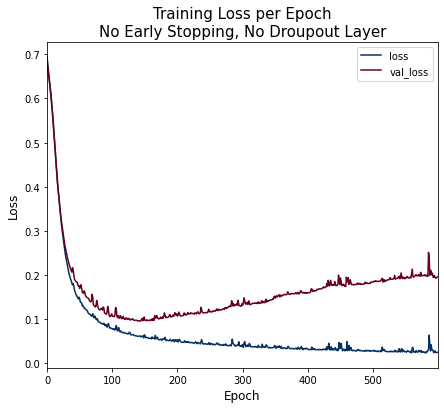

In [117]:
first_loss_df.plot(figsize=(7,6), colormap='RdBu_r')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss per Epoch\nNo Early Stopping, No Droupout Layer', fontsize=15)
plt.show()

##### 4.3.3.2. Further Evaluations

In [118]:
predictions=model.predict_classes(X_test)

In [119]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[ 60   3]
 [  4 104]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### 4.4. Model with Early Stopping and No Droupout Layer

#### 4.4.1.Creating the Model

In [120]:
model= Sequential()

model.add(Dense(30,activation='relu'))
          
model.add(Dense(30,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

#### 4.4.2. Training the model

In [121]:
es=EarlyStopping(monitor='val_loss', mode='min',patience=25,verbose=1)

In [122]:
model.fit(X_train,y_train,epochs=600, validation_data=(X_test,y_test),batch_size=128, callbacks=[es])

Epoch 1/600
4/4 [==============================] - 0s 53ms/step - loss: 0.7130 - val_loss: 0.7027
Epoch 2/600
4/4 [==============================] - 0s 6ms/step - loss: 0.7009 - val_loss: 0.6925
Epoch 3/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6910 - val_loss: 0.6839
Epoch 4/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6820 - val_loss: 0.6766
Epoch 5/600
4/4 [==============================] - 0s 5ms/step - loss: 0.6746 - val_loss: 0.6700
Epoch 6/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6679 - val_loss: 0.6629
Epoch 7/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6606 - val_loss: 0.6546
Epoch 8/600
4/4 [==============================] - 0s 5ms/step - loss: 0.6520 - val_loss: 0.6449
Epoch 9/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6416 - val_loss: 0.6333
Epoch 10/600
4/4 [==============================] - 0s 5ms/step - loss: 0.6292 - val_loss: 0.6193
Epoch 11/600
4/4 [==========

#### 4.4.3. Evaluation

##### 4.4.3.1. Training Loss per Epoch

In [123]:
second_loss_df=pd.DataFrame(model.history.history)

In [124]:
second_loss_df

,loss,val_loss
0,0.712986,0.702723
1,0.700910,0.692538
2,0.690989,0.683890
3,0.681976,0.676566
4,0.674568,0.670003
...,...,...
156,0.057818,0.116687
157,0.058349,0.117233
158,0.058221,0.117432
159,0.058067,0.117923


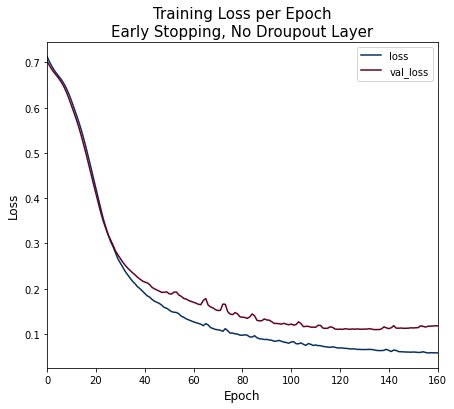

In [125]:
second_loss_df.plot(figsize=(7,6), colormap='RdBu_r')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss per Epoch\nEarly Stopping, No Droupout Layer', fontsize=15)
plt.show()

##### 4.4.3.2. Further Evaluations 

In [126]:
predictions=model.predict_classes(X_test)

In [128]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[ 58   5]
 [  0 108]]


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        63
           1       0.96      1.00      0.98       108

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### 4.5. Model with Early Stopping and Droupout Layers

#### 4.5.1. Creating the Model

In [137]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

#### 4.5.2. Training the model

In [138]:
es=EarlyStopping(monitor='val_loss', mode='min',patience=25,verbose=1)

In [139]:
model.fit(X_train,y_train,epochs=600, validation_data=(X_test,y_test),batch_size=128, callbacks=[es])

Epoch 1/600
4/4 [==============================] - 0s 22ms/step - loss: 0.6849 - val_loss: 0.6850
Epoch 2/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6747 - val_loss: 0.6787
Epoch 3/600
4/4 [==============================] - 0s 8ms/step - loss: 0.6819 - val_loss: 0.6720
Epoch 4/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6694 - val_loss: 0.6653
Epoch 5/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6627 - val_loss: 0.6588
Epoch 6/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6632 - val_loss: 0.6524
Epoch 7/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6513 - val_loss: 0.6458
Epoch 8/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6407 - val_loss: 0.6387
Epoch 9/600
4/4 [==============================] - 0s 6ms/step - loss: 0.6423 - val_loss: 0.6314
Epoch 10/600
4/4 [==============================] - 0s 5ms/step - loss: 0.6204 - val_loss: 0.6231
Epoch 11/600
4/4 [==========

Epoch 167/600
4/4 [==============================] - 0s 6ms/step - loss: 0.1146 - val_loss: 0.0942
Epoch 168/600
4/4 [==============================] - 0s 6ms/step - loss: 0.1188 - val_loss: 0.0956
Epoch 169/600
4/4 [==============================] - 0s 6ms/step - loss: 0.1244 - val_loss: 0.0964
Epoch 170/600
4/4 [==============================] - 0s 8ms/step - loss: 0.1148 - val_loss: 0.0989
Epoch 171/600
4/4 [==============================] - 0s 7ms/step - loss: 0.1162 - val_loss: 0.1038
Epoch 172/600
4/4 [==============================] - 0s 6ms/step - loss: 0.1287 - val_loss: 0.1056
Epoch 173/600
4/4 [==============================] - 0s 7ms/step - loss: 0.1128 - val_loss: 0.1038
Epoch 174/600
4/4 [==============================] - 0s 6ms/step - loss: 0.1231 - val_loss: 0.1049
Epoch 175/600
4/4 [==============================] - 0s 6ms/step - loss: 0.1455 - val_loss: 0.1000
Epoch 176/600
4/4 [==============================] - 0s 6ms/step - loss: 0.1070 - val_loss: 0.0936
Epoch 177/

Epoch 332/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0658 - val_loss: 0.0737
Epoch 333/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0670 - val_loss: 0.0742
Epoch 334/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0809 - val_loss: 0.0748
Epoch 00334: early stopping


#### 4.5.3. Evaluation

##### 4.5.3.1. Training Loss per Epoch

In [140]:
third_loss_df=pd.DataFrame(model.history.history)

In [141]:
third_loss_df

,loss,val_loss
0,0.684889,0.685040
1,0.674715,0.678666
2,0.681912,0.671995
3,0.669399,0.665259
4,0.662704,0.658827
...,...,...
329,0.066656,0.075401
330,0.074191,0.073818
331,0.065822,0.073712
332,0.066960,0.074243


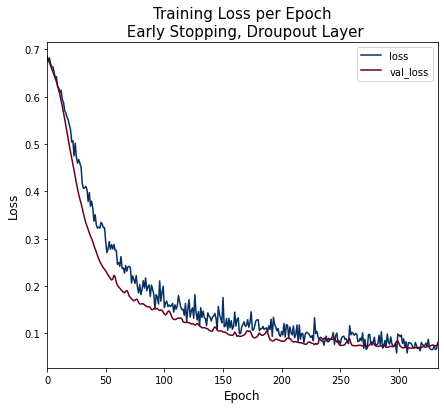

In [142]:
third_loss_df.plot(figsize=(7,6), colormap='RdBu_r')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss per Epoch\n Early Stopping, Droupout Layers', fontsize=15)
plt.show()

##### 4.5.3.2. Further Evaluations 

In [143]:
predictions=model.predict_classes(X_test)

In [145]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[ 62   1]
 [  2 106]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## 5. Conclusion

- In this notebook, we used the "Breast Cancer Wisconsin (Diagnostic) DataSet" to make predictions on the diagnosis of cancer types.

- We developed neural networks that were capable of accurately predicting whether a tumor was benign or malignant

- We implemented three diffenet deep learning classification models with and without early stopping and dropout layers. 

- While the acuuracy score obtained for the model with no early stopping and no dropout layer was 0.96, this parameter was 0.97 for the model with early stopping and no dropout layer. The highest accuracy score was 0.98 and it was obtained for the model with both early stopping and dropout layers.